### Fake Data

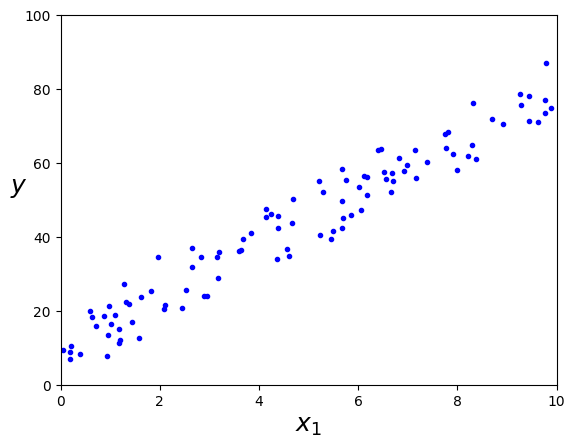

In [1]:
# Creating fake data for linear regression
import numpy as np
import matplotlib.pyplot as plt

# Create a dataset
np.random.seed(0)
w_true, b_true = 7, 9
X = 10 * np.random.rand(100, 1)
y = w_true * X + b_true + 5 * np.random.randn(100, 1)

# Plot the data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 10, 0, 100])
plt.show()

### Optimizer LLM

In [2]:
import ast
from tqdm import tqdm
from linReg_helpers import opt_llm, client

output = opt_llm("""
input:
w=18, b=15
value:
10386334
        
input:
w=17, b=18
value:
9204724""")

tuple_list = ast.literal_eval(output)

output, tuple_list

('[(-19, -16), (22, -11), (-12, 21), (20, -18), (14, 23), (-24, 13), (-8, 25), (26, -7), (27, -6), (-28, 5)]',
 [(-19, -16),
  (22, -11),
  (-12, 21),
  (20, -18),
  (14, 23),
  (-24, 13),
  (-8, 25),
  (26, -7),
  (27, -6),
  (-28, 5)])

### Scorer

In [3]:
# Catculate Least squares given a pair of w, b
def least_squares(w, b):
    y_pred = w * X + b
    return np.sum(np.log((y_pred - y) ** 2).astype(int))

def scorer_cost_function(wb_pair_tuples):
    wb_pairs = {}
    for w,b in wb_pair_tuples:
        wb_pairs[(w,b)] = least_squares(w, b)
    return wb_pairs

scorer_cost_function(tuple_list)

{(-19, -16): 913,
 (22, -11): 635,
 (-12, 21): 743,
 (20, -18): 615,
 (14, 23): 691,
 (-24, 13): 863,
 (-8, 25): 655,
 (26, -7): 723,
 (27, -6): 732,
 (-28, 5): 918}

### Plotting results

In [4]:
# Generate a list of random pairs of w, b
total_pairs = 5
w = (np.random.rand(total_pairs)* 10).astype(int)
b = (np.random.rand(total_pairs) * 10).astype(int)
wb_pairs_lst = [(w[i], b[i]) for i in range(total_pairs)]
wb_pairs = scorer_cost_function(wb_pairs_lst)
wb_pairs = dict(sorted(wb_pairs.items(), key=lambda item: item[1]))
wb_pairs

{(4, 8): 451, (4, 5): 495, (2, 5): 575, (3, 1): 593, (2, 1): 614}

In [5]:
def get_text_score_pairs(wb_pairs):
    # Assuming wb_pairs is sorted in ascending order of their function values
    text_score_pairs = ""
    for i, (k,v) in enumerate(wb_pairs.items()):
        if i == total_pairs:
            break
        text_score_pairs += f"""
        input:
        w={k[0]}, b={k[1]}
        value:
        {v}
        """
    return text_score_pairs

steps = 15
for i in tqdm(range(steps)):
    # Optimizer LLM
    output = opt_llm(get_text_score_pairs(wb_pairs))
    new_wb_pairs = ast.literal_eval(output)
    print(new_wb_pairs)
    
    # Scoring the new pairs and updating the wb_pairs
    wb_pairs.update(scorer_cost_function(new_wb_pairs))
    
    # Sorting the wb_pairs in ascending order
    wb_pairs = dict(sorted(wb_pairs.items(), key=lambda item: item[1]))

wb_pairs

  0%|          | 0/15 [00:00<?, ?it/s]

  7%|▋         | 1/15 [00:01<00:25,  1.85s/it]

[(-1, 0), (0, -1), (1, -1), (-1, -1), (0, -2), (-2, -1), (2, -2), (-2, -2), (2, -1), (-3, -2)]


 13%|█▎        | 2/15 [00:04<00:28,  2.19s/it]

[(-1, 0), (0, -1), (0, 1), (-2, 1), (1, -2), (2, -3), (-2, -1), (3, -2), (-3, 4), (2.5, 3.5)]


 20%|██        | 3/15 [00:06<00:25,  2.12s/it]

[(-1, -3), (0.5, -2), (2, -1), (-2, 0), (1, 0.5), (3, 1), (-3, 2), (0, 3), (4, 2.5), (0.5, 4)]


 27%|██▋       | 4/15 [00:08<00:25,  2.33s/it]

([3.5, 2.2], [1.7, -5.5], [-2.3, 3.8], [0.8, -7.2], [5.5, 4.1], [-4.6, -6.9], [6.2, 8.9], [9.3, -10.1], [-8.4, 12.5], [11.7, -15.3])


 33%|███▎      | 5/15 [00:10<00:21,  2.14s/it]

[(-10, -5), (15, -20), (7.5, 3), (-8, 2), (6, -3), (3, 7), (9, -7), (-5, 9), (2, -4), (4, -10)]


 40%|████      | 6/15 [00:13<00:20,  2.31s/it]

[(-14.5, 20.8), (13.2, -22.4), (-8.7, 5.6), (17.9, -18.3), (3.1, 15.9), (-5.2, 12.5), (6.6, -3.8), (-6.9, -11.2), (12.8, 7.4), (-4.3, -14.6)]


 47%|████▋     | 7/15 [00:16<00:19,  2.42s/it]

[(-10, 2.5), (8.7, -4.3), (-3.5, 5.8), (12, -6), (-8.9, 9.1), (15.3, 0.7), (-17, 18.5), (21, -10.2), (-18.5, 13.7), (22.3, -9.8)]


 53%|█████▎    | 8/15 [00:18<00:16,  2.32s/it]

[(-10, -20), (-8, -18), (-6, -16), (-4, -14), (-2, -12), (0, -10), (2, -8), (4, -6), (6, -4), (8, -2)]


 60%|██████    | 9/15 [00:20<00:14,  2.35s/it]

([7.5, 3], [6.2, 8.9], [8, -2], [8.7, -4.3], [9, -7], [-4, 10], [3.5, 6], [-8.2, 5], [2.8, -9], [5.4, -3.7])


 67%|██████▋   | 10/15 [00:24<00:14,  2.88s/it]

([7.5, 3], [6.2, 8.9], [8, -2], [8.7, -4.3], [9, -7], [8.8, -3.5], [7.4, 2.1], [9.2, -6.8], [8.5, -1], [7.2, 4.5])


 73%|███████▎  | 11/15 [00:27<00:11,  2.87s/it]

([7.1, 1.8], [6.8, 3.5], [5.9, 8.7], [8.2, 2.5], [8.7, -1.5], [4.3, 9.1], [6.4, -0.7], [6.3, 0.9], [8.9, -2.3], [5.2, 6.6])


 80%|████████  | 12/15 [00:30<00:08,  2.85s/it]

([8.5, 1.2], [6.5, 2.7], [9.1, 0.5], [5.2, 7.9], [7.1, 1.3], [4.3, 6.7], [8.9, 3.5], [4.7, 8.2], [10.3, -0.5], [3.5, 8.9])


 87%|████████▋ | 13/15 [00:33<00:05,  2.92s/it]

([7.1, 2.0], [6.8, 3.5], [8.0, 1.5], [6.0, 8.0], [7.0, 1.0], [5.5, 9.0], [1.0, 3.0], [3.0, 5.0], [0.5, 0.9], [-2.0, 1.0])


 93%|█████████▎| 14/15 [00:36<00:02,  2.87s/it]

[(-5.0, 9.0), (-7.0, 11.0), (4.0, -3.0), (3.0, 2.0), (6.0, 5.0), (-8.0, 7.0), (-4.5, 6.5), (9.0, -10.0), (1.0, -2.0), (-1.0, 3.5)]


100%|██████████| 15/15 [00:38<00:00,  2.58s/it]

[(-10, -5), (12, -7), (-15, 9), (14, 6), (-8.3, -3), (11.5, 8), (9.2, -6.8), (13.7, -4.5), (6.7, 7.3), (-12.5, 5)]


{(6.7, 7.3): 213,
 (7.5, 3): 222,
 (8.0, 1.5): 231,
 (7.2, 4.5): 234,
 (8.2, 2.5): 237,
 (6.2, 8.9): 239,
 (7.4, 2.1): 244,
 (8.5, 1.2): 246,
 (8.5, -1): 250,
 (8.7, -1.5): 260,
 (8.9, -2.3): 267,
 (6.0, 8.0): 268,
 (8.9, 3.5): 269,
 (9.1, 0.5): 276,
 (6.8, 3.5): 282,
 (8.8, -3.5): 283,
 (5.9, 8.7): 283,
 (7.1, 2.0): 290,
 (8, -2): 292,
 (7.1, 1.8): 295,
 (8.7, -4.3): 296,
 (7.1, 1.3): 309,
 (5.5, 9.0): 311,
 (9, -7): 314,
 (9.2, -6.8): 314,
 (10.3, -0.5): 325,
 (9.3, -10.1): 342,
 (7.0, 1.0): 342,
 (6.0, 5.0): 359,
 (6.5, 2.7): 361,
 (5.2, 7.9): 363,
 (9.0, -10.0): 368,
 (12, -7): 387,
 (12, -6): 393,
 (5.2, 6.6): 394,
 (4.7, 8.2): 402,
 (3.1, 15.9): 413,
 (11.7, -15.3): 414,
 (4.3, 9.1): 414,
 (5.5, 4.1): 423,
 (6.3, 0.9): 430,
 (4.3, 6.7): 446,
 (4, 8): 451,
 (6.4, -0.7): 455,
 (13.2, -22.4): 457,
 (3.5, 8.9): 461,
 (11.5, 8): 464,
 (13.7, -4.5): 472,
 (15, -20): 485,
 (6.6, -3.8): 487,
 (4, 5): 495,
 (3.5, 6): 498,
 (3, 7): 506,
 (6, -3): 511,
 (12.8, 7.4): 513,
 (6, -4): 522,
 (4,

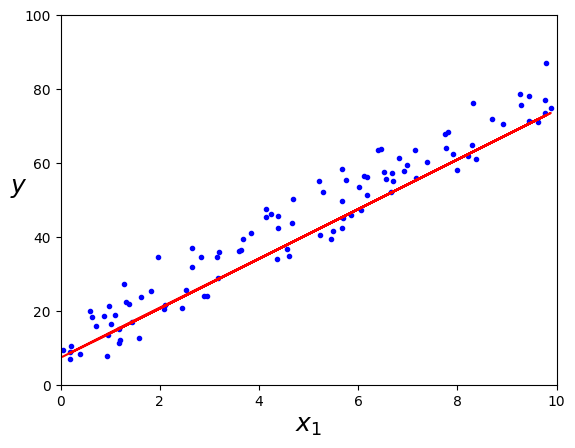

In [6]:
# Plot the data with the best fit line
best_w, best_b = list(wb_pairs.keys())[0]
y_pred = best_w * X + best_b
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 10, 0, 100])
plt.show()

In [7]:
len(wb_pairs)

134